In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#let the tensorflow don't take up all the GPU by default
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

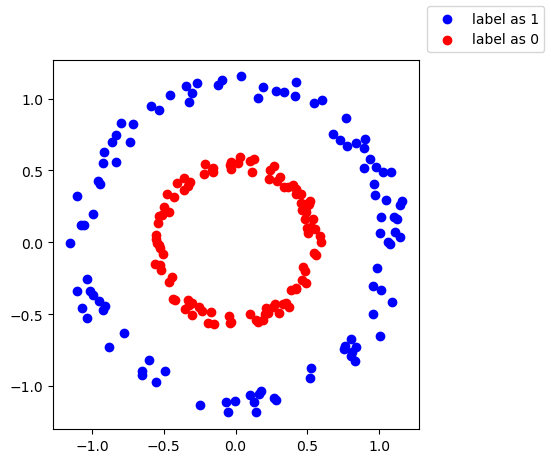

In [3]:
#Create the a dummy data for training
fig, ax = plt.subplots()
ax.set_aspect(aspect='equal')

radius = 1
num_point = 100
np_noise = np.random.rand(num_point)/5+1
np_radian_range = np.linspace(0,2*np.pi,num_point)*np_noise
np_x = np.cos(np_radian_range)*(radius*np_noise)
np_y = np.sin(np_radian_range)*(radius*np_noise)
data_positive = np.stack((np_x,np_y)).T #zip x,y cordinate as model input
label_positive = np.ones(len(data_positive)) #coresponding label as 1

ax.scatter(np_x,np_y,c = 'b')

radius = 0.5
num_point = 100
np_noise = np.random.rand(num_point)/5+1
np_radian_range = np.linspace(0,2*np.pi,num_point)*np_noise
np_x = np.cos(np_radian_range)*(radius*np_noise)
np_y = np.sin(np_radian_range)*(radius*np_noise) 
data_negative = np.stack((np_x,np_y)).T #zip x,y cordinate as model inpout
label_negative = np.zeros(len(data_negative)) #coresponding label as 0

ax.scatter(np_x,np_y, c = 'r')
fig.legend(['label as 1', 'label as 0'])

In [4]:
#prepare training data
train_data = np.concatenate((data_positive, data_negative))
train_label = np.concatenate((label_positive, label_negative))
train_label = train_label[:,np.newaxis] #expend dimension for training
#shuffle the data in the same order
shuffle_order = np.random.permutation(len(train_label))
train_data = train_data[shuffle_order,:]
train_label = train_label[shuffle_order,:]

In [10]:
#create model using keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(32,activation = 'relu', input_shape = (2,)),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [7]:
data_size = len(train_data)
num_epoch = 10 #how many times to go through the training data
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=False)
learning_rate = 0.1
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss_train = [] #use list to collect loss change from each descent step
batch_size = 20 #how many data send for gradient descent in each step

In [11]:
#Customed training loop
for epoch in range(num_epoch):
    for i in range(0, data_size, batch_size): #chop up data in batch for each gradient step
        input = train_data[i:i+batch_size,:] #model input
        target = train_label[i:i+batch_size,:] #ground truth
        with tf.GradientTape() as tape: #use tf.GradientTape to track the gradient
            prediction = model(input, training=True)
            loss = loss_func(y_true = target, y_pred = prediction)
            grads = tape.gradient(loss, model.trainable_variables)
            #one step of graidnet descend
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        loss_train.append(loss)

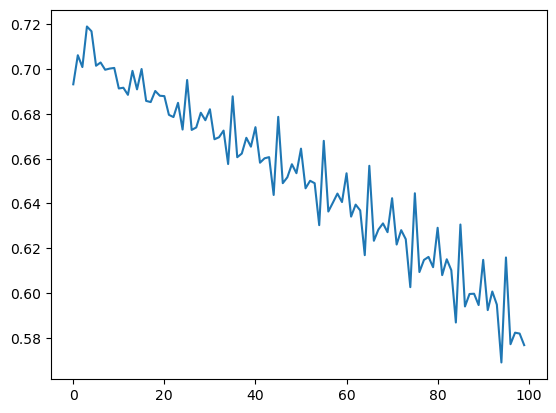

In [12]:
#plot change of loss
plt.plot(loss_train)